In [51]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from scipy.stats import mode
from math import sqrt
import catboost as cb
import statistics as st
from statistics import mode as stat_mode
import warnings
import sys
import math

warnings.filterwarnings('ignore')

sys.path.append("..")

In [2]:
data1 = pd.read_csv(f'../data/csgo_taskv2.csv')
data2 = pd.read_csv(f'../data/trip_duration_taskv2.csv')

In [3]:
data1 = data1.drop(['Unnamed: 0'], axis=1)
data2 = data2.drop(['Unnamed: 0'], axis=1)

Dataset №1

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         122410 non-null  float64
 1   ct_score          122410 non-null  int64  
 2   t_score           122410 non-null  int64  
 3   map               122410 non-null  object 
 4   bomb_planted      122410 non-null  bool   
 5   ct_health         122410 non-null  int64  
 6   t_health          122410 non-null  int64  
 7   ct_armor          122410 non-null  int64  
 8   t_armor           122410 non-null  int64  
 9   ct_money          122410 non-null  int64  
 10  t_money           122410 non-null  int64  
 11  ct_helmets        122410 non-null  int64  
 12  t_helmets         122410 non-null  int64  
 13  ct_defuse_kits    122410 non-null  int64  
 14  ct_players_alive  122410 non-null  int64  
 15  t_players_alive   122410 non-null  int64  
dtypes: bool(1), float64(

In [5]:
data1.isna().sum()

time_left           0
ct_score            0
t_score             0
map                 0
bomb_planted        0
ct_health           0
t_health            0
ct_armor            0
t_armor             0
ct_money            0
t_money             0
ct_helmets          0
t_helmets           0
ct_defuse_kits      0
ct_players_alive    0
t_players_alive     0
dtype: int64

In [6]:
for unique in data1['bomb_planted'].unique():
    print(unique, data1['bomb_planted'].loc[data1['bomb_planted'] == unique].count())

False 108726
True 13684


In [7]:
data_major_true = data1[data1['bomb_planted'] == True]
data_major_false = data1[data1['bomb_planted'] == False]

data_major_false_undersampled = data_major_false.sample(len(data_major_true))
data1 = pd.concat([data_major_false_undersampled, data_major_true], axis = 0)

y_cs = data1['bomb_planted']
for unique in y_cs.unique():
    print(unique, y_cs.loc[y_cs == unique].count())

False 13684
True 13684


In [8]:
data1 = data1.drop(['map'], axis=1)
x_cs = data1.drop(['bomb_planted'], axis=1)
x_train_cs, x_test_cs, y_train_cs, y_test_cs = train_test_split(x_cs, y_cs, test_size=0.3)

Dataset №2

In [9]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 729322 non-null  object 
 1   vendor_id          729322 non-null  int64  
 2   passenger_count    729322 non-null  int64  
 3   pickup_longitude   729322 non-null  float64
 4   pickup_latitude    727475 non-null  float64
 5   dropoff_longitude  729322 non-null  float64
 6   dropoff_latitude   729322 non-null  float64
 7   trip_duration      729322 non-null  int64  
 8   pickup_datetime    729322 non-null  object 
 9   dropoff_datetime   729322 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 55.6+ MB


In [10]:
data2.isna().sum()

id                      0
vendor_id               0
passenger_count         0
pickup_longitude        0
pickup_latitude      1847
dropoff_longitude       0
dropoff_latitude        0
trip_duration           0
pickup_datetime         0
dropoff_datetime        0
dtype: int64

In [11]:
mean_r = -0.0008561123804995453
for i in range(len(data2['pickup_latitude'])):
    if math.isnan(data2['pickup_latitude'].loc[data2.index[i]]):
        data2['pickup_latitude'].loc[data2.index[i]] = data2['dropoff_latitude'].loc[data2.index[i]] + mean_r
data2.isna().sum()

id                   0
vendor_id            0
passenger_count      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
trip_duration        0
pickup_datetime      0
dropoff_datetime     0
dtype: int64

In [12]:
data2 = data2.drop(['id'], axis=1)
data2 = data2.drop(['pickup_datetime'], axis=1)
data2 = data2.drop(['dropoff_datetime'], axis=1)

In [13]:
y_tx = data2['trip_duration']
x_tx = data2.drop(['trip_duration'], axis=1)

In [14]:
x_train_tx, x_test_tx, y_train_tx, y_test_tx = train_test_split(x_tx, y_tx, test_size=0.3)

## DecisionTreeClassifier

In [15]:
param_grid = {
    "max_depth": range(1, 8),
    "min_samples_split": range(1, 6),
    "criterion": ['gini', 'entropy', 'log_loss']
}

gridseach = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
gridseach.fit(x_train_cs, y_train_cs)
gridseach.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}

In [16]:
tree_cl = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_split = 4)
tree_cl.fit(x_train_cs, y_train_cs)
y_pred_cs = tree_cl.predict(x_test_cs)

[Text(0.5267857142857143, 0.9285714285714286, 'x[0] <= 40.095\ngini = 0.5\nsamples = 19157\nvalue = [9648, 9509]'),
 Text(0.5089285714285714, 0.7857142857142857, 'x[5] <= 310.5\ngini = 0.167\nsamples = 10470\nvalue = [961, 9509]'),
 Text(0.28125, 0.6428571428571429, 'x[0] <= 34.765\ngini = 0.109\nsamples = 9323\nvalue = [539, 8784]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= 15.31\ngini = 0.068\nsamples = 7601\nvalue = [266, 7335]'),
 Text(0.07142857142857142, 0.35714285714285715, 'x[0] <= 14.855\ngini = 0.135\nsamples = 2503\nvalue = [182, 2321]'),
 Text(0.03571428571428571, 0.21428571428571427, 'x[0] <= 14.785\ngini = 0.035\nsamples = 2285\nvalue = [41, 2244]'),
 Text(0.017857142857142856, 0.07142857142857142, 'gini = 0.031\nsamples = 2259\nvalue = [35, 2224]'),
 Text(0.05357142857142857, 0.07142857142857142, 'gini = 0.355\nsamples = 26\nvalue = [6, 20]'),
 Text(0.10714285714285714, 0.21428571428571427, 'x[0] <= 14.975\ngini = 0.457\nsamples = 218\nvalue = [141, 77]'),
 Text(0.089285

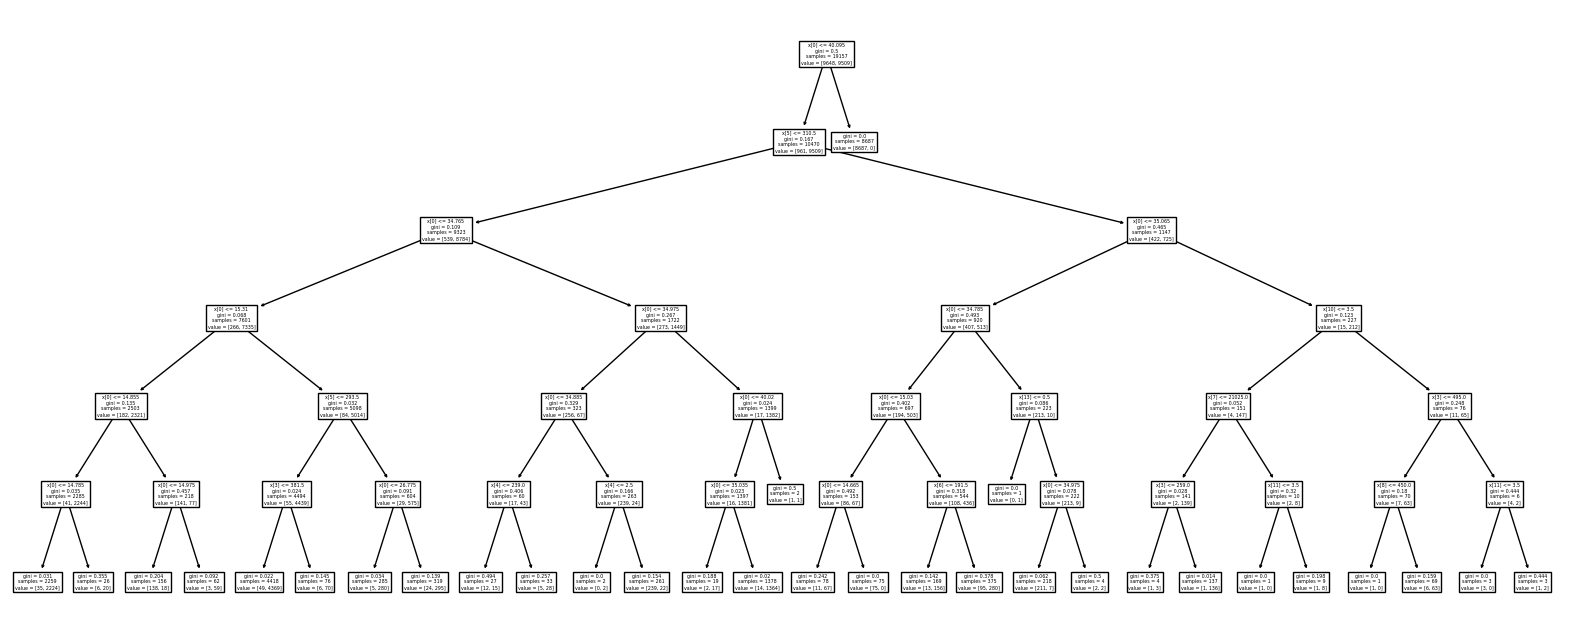

In [17]:
plt.figure(figsize=(20,8))

tree.plot_tree(tree_cl)

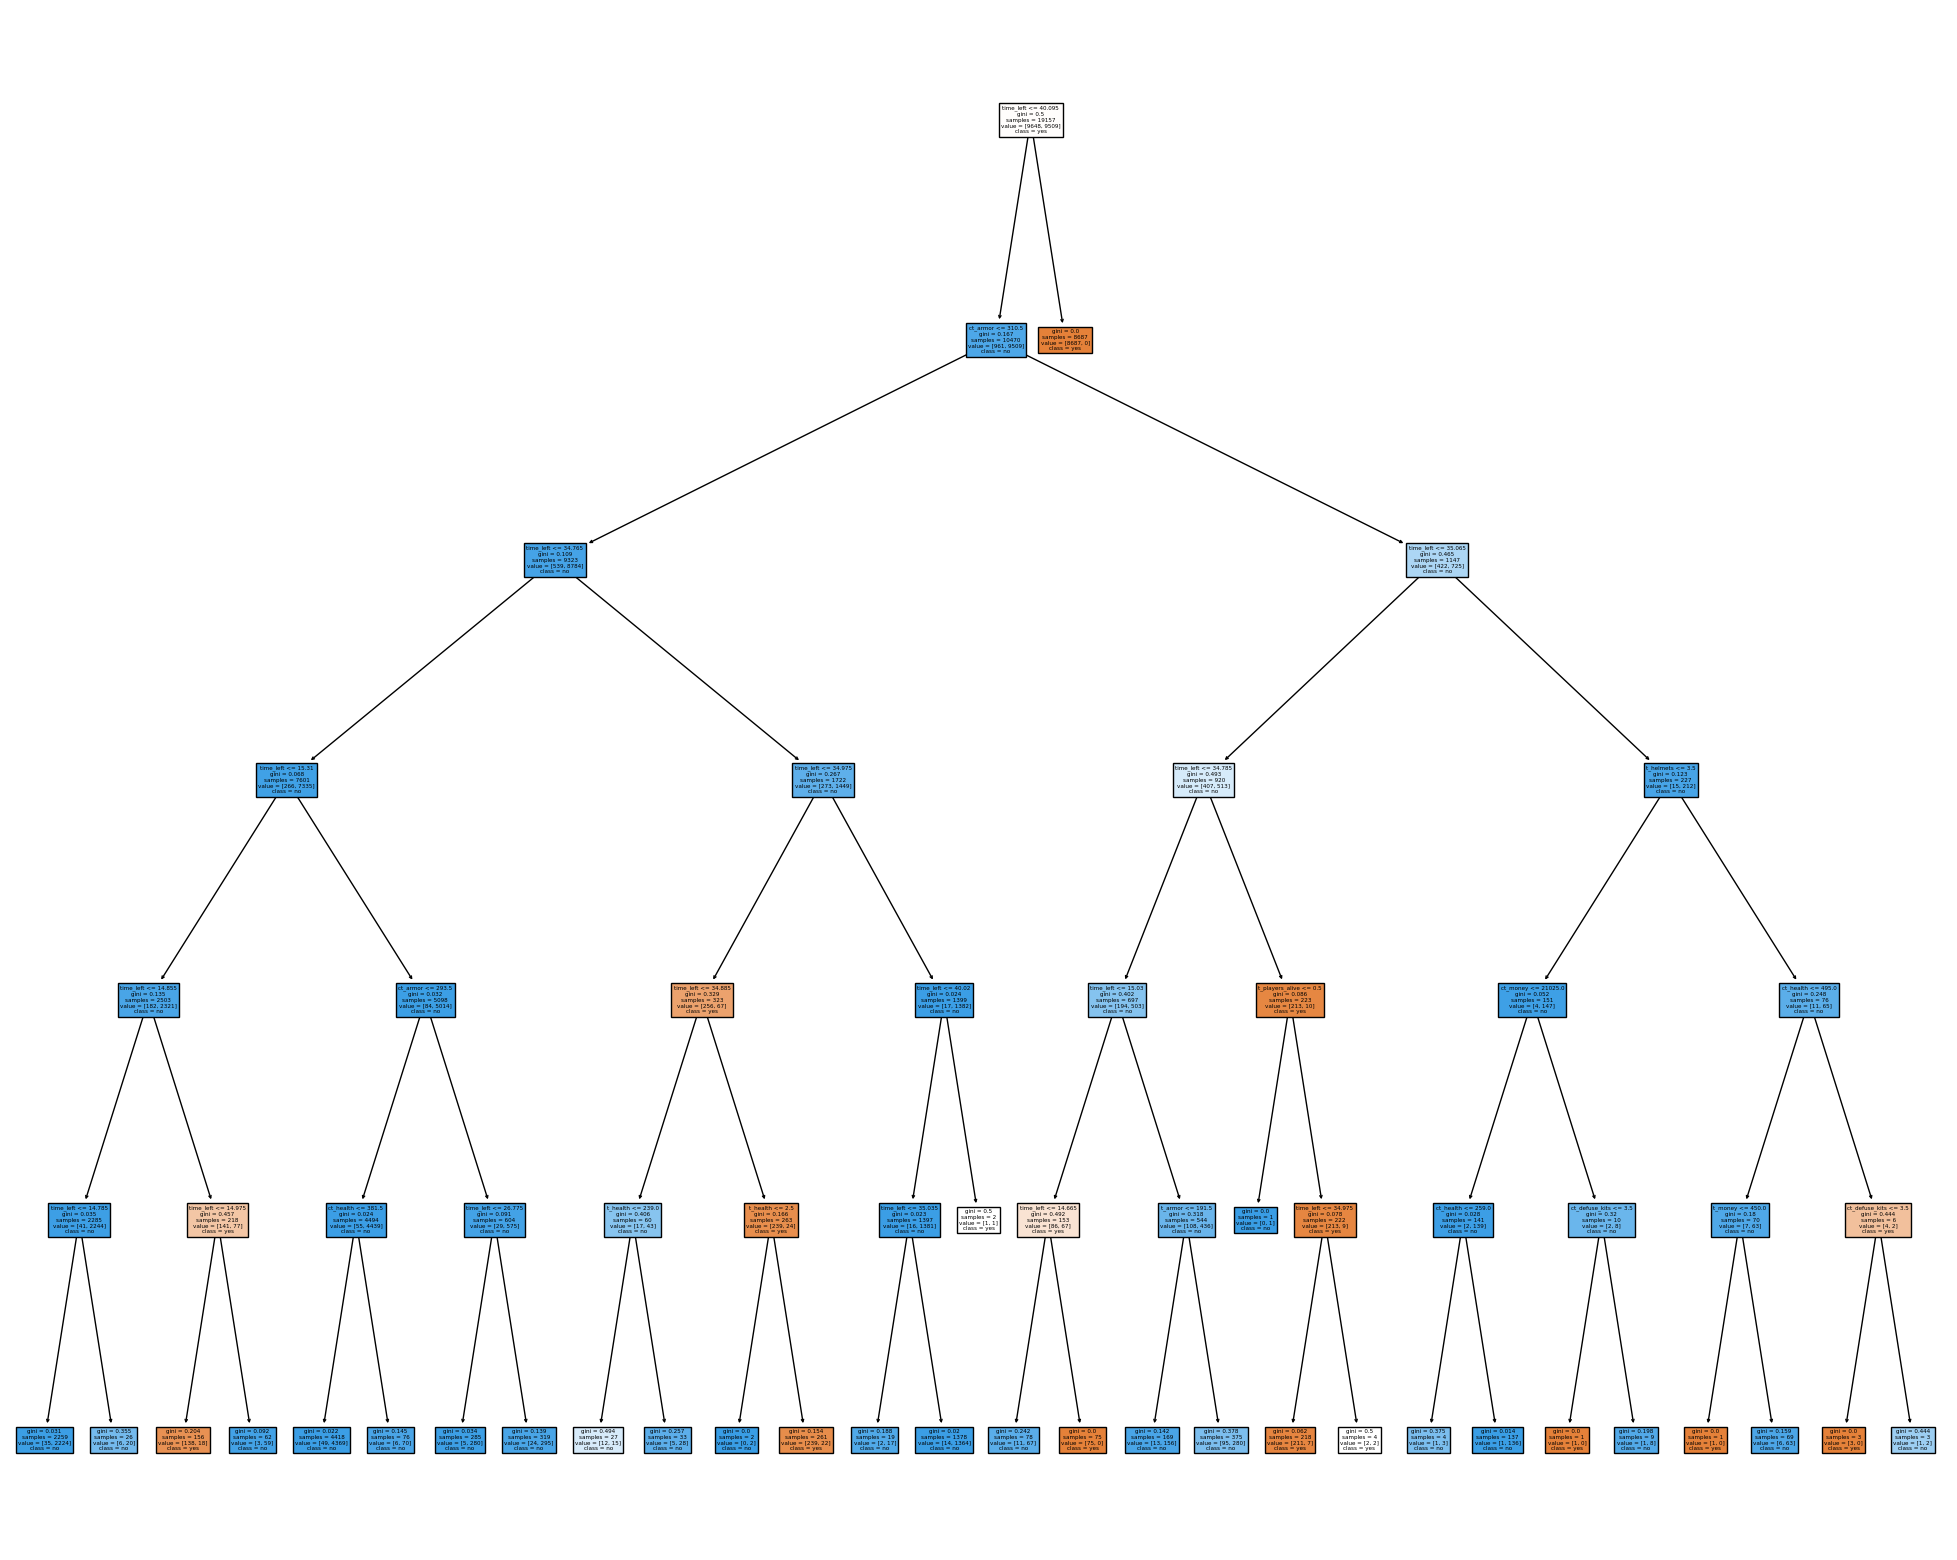

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_cl, feature_names = x_cs.columns.values.tolist (), class_names=["yes", "no"] , filled=True)

In [19]:
cm = confusion_matrix(y_test_cs, y_pred_cs)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[3911  125]
 [  32 4143]]


In [20]:
print(classification_report(y_test_cs, y_pred_cs))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4036
        True       0.97      0.99      0.98      4175

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



## DecisionTreeRegression

In [22]:
'''param_grid = {
    "max_depth": range(2,8),
    "min_samples_split": range(2, 6),
    "criterion": ['squared_error', 'friedman_mse', 'absolute_error', 'puisson']
}

gridseach = GridSearchCV(DecisionTreeRegressor(), param_grid = param_grid, scoring ='r2')
gridseach.fit(x_train_cs, y_train_cs)
gridseach.best_params_
{'criterion': 'friedman_mse', 'max_depth': 6, 'min_samples_split': 3}'''

'param_grid = {\n    "max_depth": range(2,8),\n    "min_samples_split": range(2, 6),\n    "criterion": [\'squared_error\', \'friedman_mse\', \'absolute_error\', \'puisson\']\n}\n\ngridseach = GridSearchCV(DecisionTreeRegressor(), param_grid = param_grid, scoring =\'r2\')\ngridseach.fit(x_train_cs, y_train_cs)\ngridseach.best_params_\n{\'criterion\': \'friedman_mse\', \'max_depth\': 6, \'min_samples_split\': 3}'

In [21]:
tree_rg = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 6, min_samples_split = 3)
tree_rg.fit(x_train_tx, y_train_tx)
y_pred_tx = tree_rg.predict(x_test_tx)

In [22]:
print(tree.export_text(tree_rg))

|--- feature_2 <= -73.87
|   |--- feature_4 <= -73.91
|   |   |--- feature_5 <= 40.71
|   |   |   |--- feature_3 <= 40.73
|   |   |   |   |--- feature_5 <= 40.70
|   |   |   |   |   |--- feature_5 <= 40.70
|   |   |   |   |   |   |--- value: [1089.45]
|   |   |   |   |   |--- feature_5 >  40.70
|   |   |   |   |   |   |--- value: [85821.00]
|   |   |   |   |--- feature_5 >  40.70
|   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |--- value: [618.41]
|   |   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |   |--- value: [914.62]
|   |   |   |--- feature_3 >  40.73
|   |   |   |   |--- feature_5 <= 40.70
|   |   |   |   |   |--- feature_5 <= 40.70
|   |   |   |   |   |   |--- value: [2036.03]
|   |   |   |   |   |--- feature_5 >  40.70
|   |   |   |   |   |   |--- value: [43268.50]
|   |   |   |   |--- feature_5 >  40.70
|   |   |   |   |   |--- feature_5 <= 40.71
|   |   |   |   |   |   |--- value: [1383.67]
|   |   |   |   |   |--- feature_5 >  40.71
|   |   | 

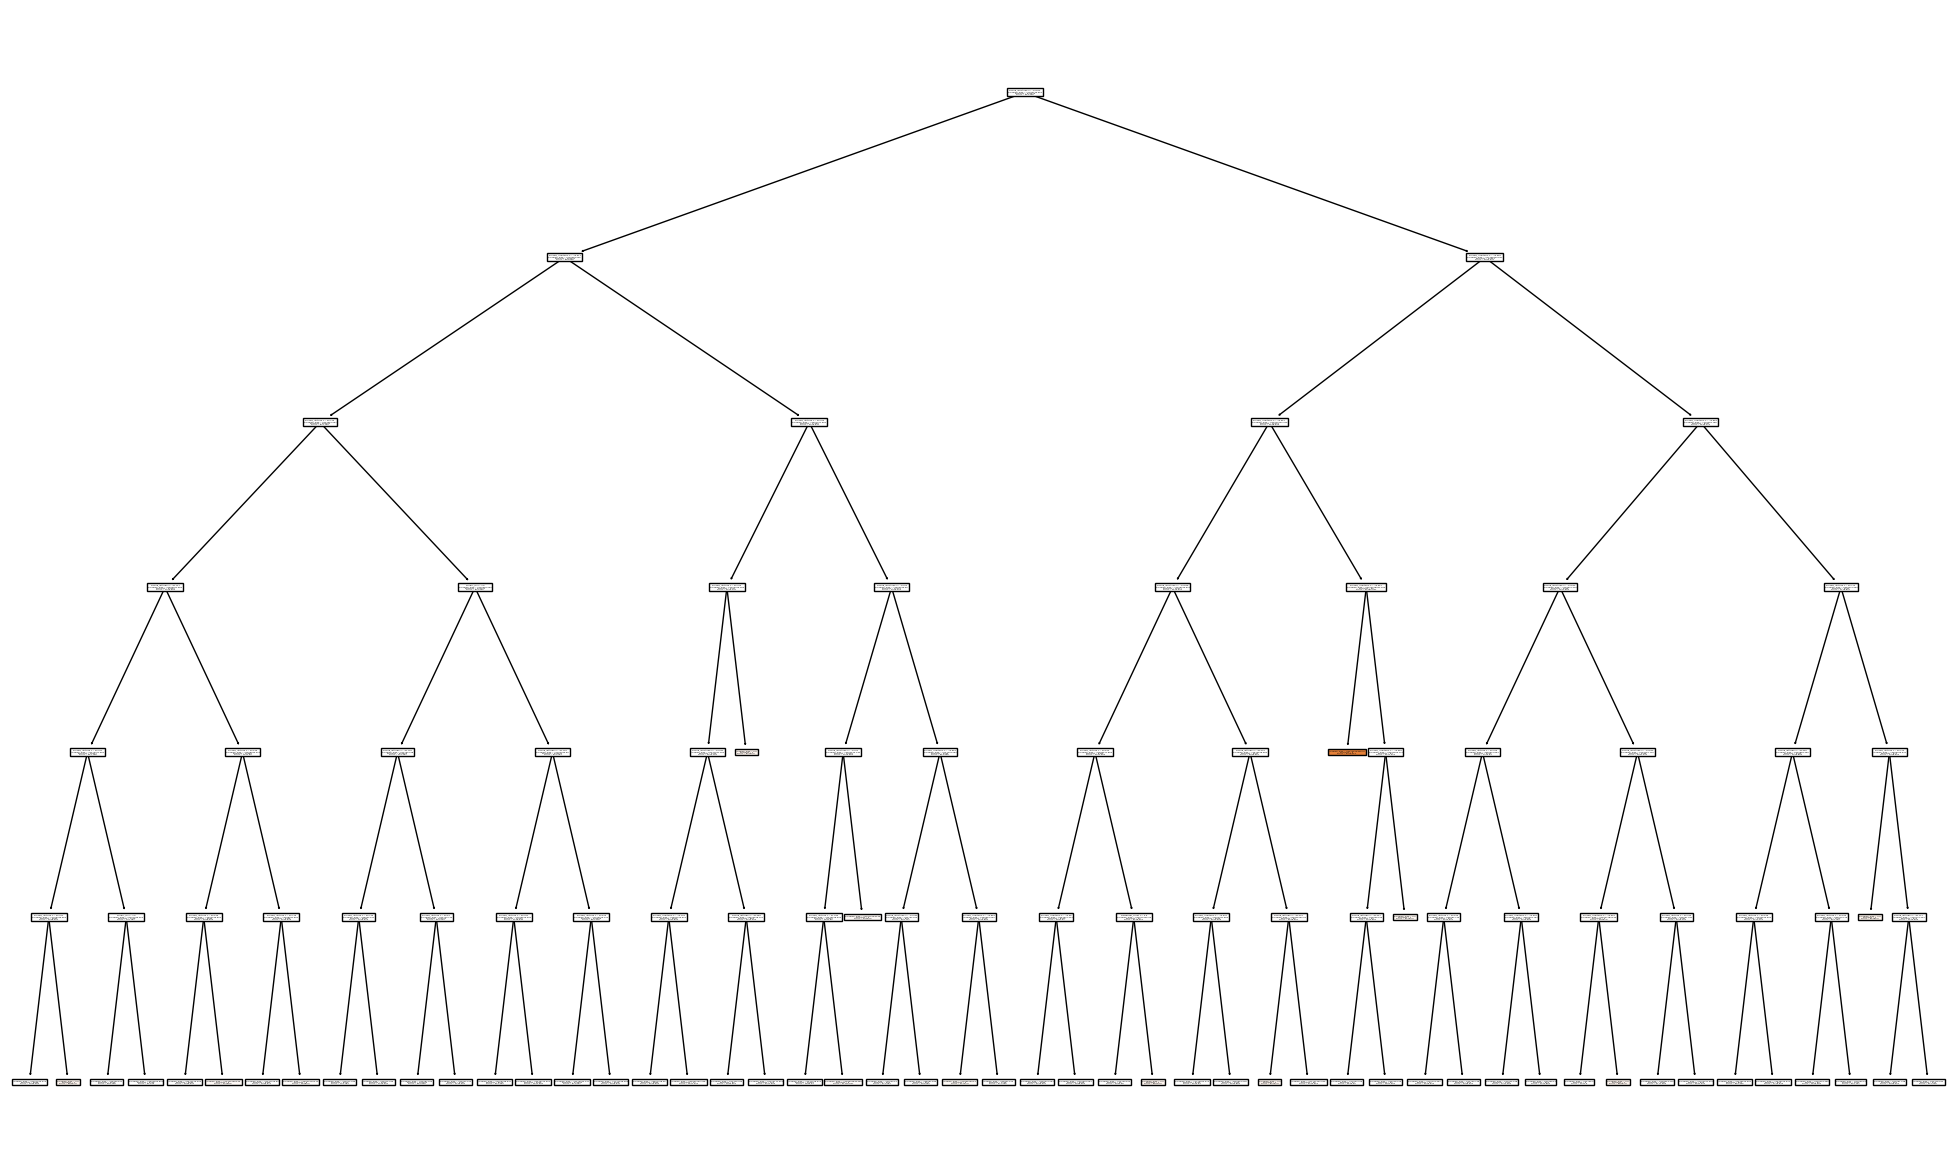

In [23]:
fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(tree_rg, feature_names = x_tx.columns.values.tolist (), filled=True)

In [24]:
def Errors(y_test, y_predict):
    MAE = mean_absolute_error(y_test, y_predict)
    MSE = mean_squared_error(y_test, y_predict)
    RMSE = sqrt(mean_squared_error(y_test, y_predict))
    MAPE = sqrt(mean_absolute_percentage_error(y_test, y_predict))
    R2 = r2_score(y_test, y_predict)

    print('MAE: ', MAE,'MSE: ', MSE, 'RMSE: ', RMSE, 'MAPE: ', MAPE, 'R2: ', R2) 

In [25]:
Errors(y_test_tx, y_pred_tx)

MAE:  514.200085763463 MSE:  9648261.053117966 RMSE:  3106.1650073874 MAPE:  1.1261372682621076 R2:  0.0019185329280710928


## Bagging

In [26]:
#Classifier
bagging_cl = BaggingClassifier().fit(x_train_cs, y_train_cs)
y_pred_cl = bagging_cl.predict(x_test_cs)

print(classification_report(y_test_cs, y_pred_cl))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4036
        True       0.97      0.99      0.98      4175

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [27]:
#Regressor
bagging_rg = BaggingRegressor().fit(x_train_tx, y_train_tx)
y_pred_rg_b = bagging_rg.predict(x_test_tx)

Errors(y_test_tx, y_pred_rg_b)

MAE:  486.325915616815 MSE:  11017625.610724654 RMSE:  3319.280887590662 MAPE:  0.8593510821382268 R2:  -0.13973781105846572


## GradientBoosting

In [28]:
gradient_cl = GradientBoostingClassifier().fit(x_train_cs, y_train_cs)
y_pred_cl_gb = gradient_cl.predict(x_test_cs)

print(classification_report(y_test_cs, y_pred_cl_gb))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4036
        True       0.97      0.99      0.98      4175

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [29]:
gradient_rg = GradientBoostingRegressor().fit(x_train_tx, y_train_tx)
y_pred_rg_gb = gradient_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_rg_gb)

MAE:  463.50860555574593 MSE:  9606374.759729555 RMSE:  3099.4152286729113 MAPE:  1.1028573188050652 R2:  0.006251534794951552


## Stacking

In [30]:
stacking_cl = StackingClassifier(estimators=[('en', DecisionTreeClassifier(criterion='entropy')),
                                        ('gini', DecisionTreeClassifier(criterion='gini'))],
                                        final_estimator=KNeighborsClassifier(10)).fit(x_train_cs, y_train_cs)

y_pred_cs_sk = stacking_cl.predict(x_test_cs)

print(classification_report(y_test_cs, y_pred_cs_sk))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4036
        True       0.97      0.99      0.98      4175

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [31]:
stacking_rg = StackingRegressor(estimators=[('en', DecisionTreeRegressor(max_depth=3)),
                                          ('lin_reg', LinearRegression())],
                               final_estimator=LinearRegression()).fit(x_train_tx, y_train_tx)

y_pred_tx_sk = stacking_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_tx_sk)

MAE:  552.4100716155951 MSE:  9553448.743083902 RMSE:  3090.8653712324485 MAPE:  1.214965777747416 R2:  0.011726560403104713


## CatBoost

In [57]:
'''
catboost_rg = CatBoostRegressor(iterations=150, 
                          depth=2, 
                          learning_rate=1, 
                          loss_function='RMSE').fit(x_train_tx, y_train_tx)
'''

"\ncatboost_rg = CatBoostRegressor(iterations=150, \n                          depth=2, \n                          learning_rate=1, \n                          loss_function='RMSE').fit(x_train_tx, y_train_tx)\n"

In [58]:
y_pred_cat_rg = catboost_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_cat_rg)

MAE:  452.8828552616097 MSE:  9426880.446712952 RMSE:  3070.3225313821595 MAPE:  0.9563438980648973 R2:  0.024819642175170742


In [61]:
catboost_cl = CatBoostClassifier(iterations=150,
                           depth=4,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           verbose=True).fit(x_train_cs, y_train_cs)


0:	learn: 0.6150687	total: 2.83ms	remaining: 422ms
1:	learn: 0.5514482	total: 5.12ms	remaining: 379ms
2:	learn: 0.4982897	total: 7.41ms	remaining: 363ms
3:	learn: 0.4523859	total: 10.3ms	remaining: 377ms
4:	learn: 0.4099340	total: 12.7ms	remaining: 368ms
5:	learn: 0.3768748	total: 14.7ms	remaining: 352ms
6:	learn: 0.3442309	total: 16.9ms	remaining: 345ms
7:	learn: 0.3156476	total: 19.2ms	remaining: 340ms
8:	learn: 0.2934716	total: 21.5ms	remaining: 337ms
9:	learn: 0.2742418	total: 23.5ms	remaining: 329ms
10:	learn: 0.2574757	total: 25.7ms	remaining: 325ms
11:	learn: 0.2393265	total: 27.8ms	remaining: 319ms
12:	learn: 0.2263133	total: 29.8ms	remaining: 314ms
13:	learn: 0.2119403	total: 31.9ms	remaining: 310ms
14:	learn: 0.2000271	total: 34.1ms	remaining: 307ms
15:	learn: 0.1899535	total: 36.2ms	remaining: 303ms
16:	learn: 0.1817734	total: 38.2ms	remaining: 299ms
17:	learn: 0.1720119	total: 40.7ms	remaining: 298ms
18:	learn: 0.1638758	total: 42.7ms	remaining: 294ms
19:	learn: 0.1577133	t

In [60]:
y_pred_cat = catboost_cl.predict(x_test_cs)
y_pred_cat = y_pred_cat.astype(bool)
print(classification_report(y_test_cs, y_pred_cat))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      4036
        True       0.51      1.00      0.67      4175

    accuracy                           0.51      8211
   macro avg       0.25      0.50      0.34      8211
weighted avg       0.26      0.51      0.34      8211



## XGBC

In [38]:
xgbc_cl = XGBClassifier().fit(x_train_cs, y_train_cs)
y_pred_xgbc_cl = xgbc_cl.predict(x_test_cs)
print(classification_report(y_test_cs, y_pred_xgbc_cl))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98      4163
        True       0.96      0.99      0.98      4048

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



In [39]:
xgbc_rg = XGBRegressor().fit(x_train_tx, y_train_tx)
y_pred_xgbc_rg = xgbc_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_xgbc_rg)

MAE:  440.36820103345474 MSE:  9455726.756887544 RMSE:  3075.016545790859 MAPE:  0.9052149176700544 R2:  0.005978671400684199


## LGBM

In [40]:
# Regression
import re
x_train_tx = x_train_tx.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
lgbm_rg = LGBMRegressor().fit(x_train_tx, y_train_tx)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 510525, number of used features: 6
[LightGBM] [Info] Start training from score 954.897658


In [41]:
y_pred_lgbm_rg = lgbm_rg.predict(x_test_tx)
Errors(y_test_tx, y_pred_lgbm_rg)

MAE:  442.9742898442759 MSE:  9479048.663306113 RMSE:  3078.806369895014 MAPE:  0.9844278583337268 R2:  0.00352698545420016


In [42]:
# Class
x_train_cs = x_train_cs.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
lgbm_cl = LGBMClassifier().fit(x_train_cs, y_train_cs)

[LightGBM] [Info] Number of positive: 9636, number of negative: 9521
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1769
[LightGBM] [Info] Number of data points in the train set: 19157, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503002 -> initscore=0.012006
[LightGBM] [Info] Start training from score 0.012006


In [43]:
y_pred_lgbm_cl = lgbm_cl.predict(x_test_cs)
print(classification_report(y_test_cs, y_pred_lgbm_cl))

              precision    recall  f1-score   support

       False       0.99      0.97      0.98      4163
        True       0.97      0.99      0.98      4048

    accuracy                           0.98      8211
   macro avg       0.98      0.98      0.98      8211
weighted avg       0.98      0.98      0.98      8211



MyCart

In [62]:
class MyCart:
    def __init__(self, criterion, max_depth, min_samples_split):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.depth = 0

    def fit(self, x, y):
        self.x, self.y = x, y
        self.node = self.build_DT(x, y)
        print(self.node)

    def gini(self, y):
        gini_right = len(y[1]) * (1 - np.sum((np.bincount(y[1]) / len(y[1]))**2))
        gini_left = len(y[0]) * (1 - np.sum((np.bincount(y[0]) / len(y[0]))**2))
        gini = (len(y[0]) * gini_left + len(y[1]) * gini_right) / ( len(y[0]) + len(y[1]) )
        return gini

    def mse(self, y):
        mse_right = np.mean(y[1] - np.mean(y[1]))**2
        mse_left = np.mean(y[0] - np.mean(y[0]))**2
        mse = (len(y[0]) * mse_left + len(y[1]) * mse_right) / ( len(y[0]) + len(y[1]) )
        return mse

    def optimal_split(self):
        metric = 10**10
        optimal_border = None
        for index_column in range(self.x.shape[1]):
            borders = np.unique(self.x[:, index_column])
            for border in borders:
                right = border > self.x[:, index_column]
                left = border <= self.x[:, index_column]
                if (self.criterion == 'mse'):
                    func_loss = self.mse([self.y[left], self.y[right]])
                elif (self.criterion == 'gini'):
                    func_loss = self.gini([self.y[left], self.y[right]])
                if func_loss < metric:
                    metric = func_loss
                    optimal_border = [index_column, border]
                    
        return optimal_border

    def build_DT(self, x, y):
        if (self.depth >= self.max_depth) or (self.x.shape[0] <= self.min_samples_split):
            if (self.criterion == 'mse'):
                leaf = np.mean(y)
            elif (self.criterion == 'gini'):
                leaf = stat_mode(y)
            return {'predict': leaf}

        optimal_border = self.optimal_split()
        self.depth+=1
        right = optimal_border[1] > self.x[:, optimal_border[0]]
        left = optimal_border[1] <= self.x[:, optimal_border[0]]

        node = { 'index_column': optimal_border[0],
                 'value': optimal_border[1],
                 'right': self.build_DT(self.x[right], self.y[right]) ,
                 'left': self.build_DT(self.x[left], self.y[left])
               }
        return node

    def predict(self, x_test):
        predict = []
        for x in x_test:
            predict.append(self.searcher(x, self.node))

        return np.array(predict)

    def searcher(self, x, node):
        if ('predict' in node):
            return node['predict']
        elif node['value'] >= x[node['index_column']] :
            return self.searcher(x, node['left'])
        else:
            return self.searcher(x, node['right'])


In [105]:
#Regression
MyCartReg = MyCart('mse', max_depth = 6, min_samples_split = 3)

In [ ]:
MyCartReg.fit(x_train_tx.to_numpy(), y_train_tx.to_numpy())

In [99]:
predict = MyCartReg.predict(x_test_tx.to_numpy())

In [100]:
Errors(y_test_tx, predict)

MAE:  1375.4403125 MSE:  70823458.21995117 RMSE:  8415.667425697808 MAPE:  1.3201018421354085 R2:  -0.003245058639197662


In [140]:
#Classifier
MyCartCl = MyCart('gini', max_depth = 8, min_samples_split = 4)

In [141]:
MyCartCl.fit(x_train_cs.to_numpy(), y_train_cs.to_numpy())

{'index_column': 0, 'value': 66.88, 'right': {'index_column': 0, 'value': 66.88, 'right': {'index_column': 0, 'value': 66.88, 'right': {'index_column': 0, 'value': 66.88, 'right': {'index_column': 0, 'value': 66.88, 'right': {'index_column': 0, 'value': 66.88, 'right': {'index_column': 0, 'value': 66.88, 'right': {'index_column': 0, 'value': 66.88, 'right': {'predict': True}, 'left': {'predict': False}}, 'left': {'predict': False}}, 'left': {'predict': False}}, 'left': {'predict': False}}, 'left': {'predict': False}}, 'left': {'predict': False}}, 'left': {'predict': False}}, 'left': {'predict': False}}


In [142]:
predict_cl = MyCartCl.predict(x_test_cs.to_numpy())

In [143]:
print(classification_report(y_test_cs, predict_cl))

              precision    recall  f1-score   support

       False       0.27      0.25      0.26        12
        True       0.00      0.00      0.00         8

    accuracy                           0.15        20
   macro avg       0.14      0.12      0.13        20
weighted avg       0.16      0.15      0.16        20

